# PGM Project

## Case Study

To identify fraud claims across pharmacies dispensing DrugK, using network analysis approach.

## Data Prep:
- Data cleansing
- Variable Transformation
- Feature engineering

## Bayesian Network:
- Construct Bayesian network by considering all possible attributes of a prescription
- Perform parametric estimation of probabilities
- Find out all events leading to a case of substance abuse with rare evidence

## Markov Chain:
- How likely a patient is to switch from low dose category to high dose category (Change in supply/ Reduction in days/ Changed strength of drug?)
- Define state space of an event
- Draw inference by estimating posterior probabilities of events

## Inferences

1) Very LOW number for the "Probability of the possible sequence of states", based on the data
2) As a result, for a sequence of ten, the forcast of the state does not change

## Note

Tech. Support, upon review, has commented this implementation meets and exceeds expectations

In [1]:
import datetime, time
print(datetime.datetime.now())
start_time = time.time()

2020-10-22 19:23:29.442285


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.decomposition import PCA

## Data Prep:

In [2]:
#Claim_Dataset_Part1.csv
claims1_df=pd.read_csv('Datasets/Claim_Dataset_Part1.csv', sep=',')
print(claims1_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
UID             2000 non-null int64
PhID            2000 non-null int64
PresID          2000 non-null int64
CLID            2000 non-null float64
PATID           2000 non-null int64
ID              2000 non-null int64
DCID            2000 non-null int64
Qty             2000 non-null int64
Days            2000 non-null int64
Refill          2000 non-null int64
Strength        2000 non-null float64
Amount          2000 non-null float64
Gender          2000 non-null int64
Age             2000 non-null int64
Fill Date       2000 non-null object
Written Date    2000 non-null object
Fill GAP        2000 non-null int64
NextRefill      2000 non-null object
EarlyRefill     2000 non-null int64
Fraud           2000 non-null int64
dtypes: float64(3), int64(14), object(3)
memory usage: 312.6+ KB
None


In [4]:
claims1_df.head(5)

,UID,PhID,PresID,CLID,PATID,ID,DCID,Qty,Days,Refill,Strength,Amount,Gender,Age,Fill Date,Written Date,Fill GAP,NextRefill,EarlyRefill,Fraud
0,1,3127172,2031955,1.820000e+14,200599,77687332,406048533,12,3,0,4.5,3.01,0,39,23-06-2018,23-06-2018,0,26-06-2018,0,0
1,2,3127934,3145680,1.820000e+14,200810,76558228,65162003434,14,4,0,4.5,3.22,0,32,31-05-2018,31-05-2018,0,04-06-2018,0,0
2,3,3127934,3146402,1.820000e+14,200810,77705008,62037052524,10,2,0,7.5,4.75,0,32,02-06-2018,06-02-2018,116,04-06-2018,1,0
3,4,3127934,3147500,1.820000e+14,200810,77705143,65162003434,12,2,0,4.5,3.01,0,32,05-06-2018,06-05-2018,30,07-06-2018,0,0
4,5,3141427,1041174,1.700000e+14,201658,59837307,42858010324,30,30,0,7.5,5.53,0,29,26-01-2017,26-01-2017,0,25-02-2017,0,0


In [5]:
claims1_df['Fill_Date_dt'] = pd.to_datetime(claims1_df['Fill Date'])
claims1_df['Written_Date_dt'] = pd.to_datetime(claims1_df['Written Date'])
print(claims1_df.info())
claims1_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
UID                2000 non-null int64
PhID               2000 non-null int64
PresID             2000 non-null int64
CLID               2000 non-null float64
PATID              2000 non-null int64
ID                 2000 non-null int64
DCID               2000 non-null int64
Qty                2000 non-null int64
Days               2000 non-null int64
Refill             2000 non-null int64
Strength           2000 non-null float64
Amount             2000 non-null float64
Gender             2000 non-null int64
Age                2000 non-null int64
Fill Date          2000 non-null object
Written Date       2000 non-null object
Fill GAP           2000 non-null int64
NextRefill         2000 non-null object
EarlyRefill        2000 non-null int64
Fraud              2000 non-null int64
Fill_Date_dt       2000 non-null datetime64[ns]
Written_Date_dt    2000 non-null datetime64[ns]
dtypes: 

,UID,PhID,PresID,CLID,PATID,ID,DCID,Qty,Days,Refill,...,Gender,Age,Fill Date,Written Date,Fill GAP,NextRefill,EarlyRefill,Fraud,Fill_Date_dt,Written_Date_dt
0,1,3127172,2031955,1.820000e+14,200599,77687332,406048533,12,3,0,...,0,39,23-06-2018,23-06-2018,0,26-06-2018,0,0,2018-06-23,2018-06-23
1,2,3127934,3145680,1.820000e+14,200810,76558228,65162003434,14,4,0,...,0,32,31-05-2018,31-05-2018,0,04-06-2018,0,0,2018-05-31,2018-05-31
2,3,3127934,3146402,1.820000e+14,200810,77705008,62037052524,10,2,0,...,0,32,02-06-2018,06-02-2018,116,04-06-2018,1,0,2018-02-06,2018-06-02
3,4,3127934,3147500,1.820000e+14,200810,77705143,65162003434,12,2,0,...,0,32,05-06-2018,06-05-2018,30,07-06-2018,0,0,2018-05-06,2018-06-05
4,5,3141427,1041174,1.700000e+14,201658,59837307,42858010324,30,30,0,...,0,29,26-01-2017,26-01-2017,0,25-02-2017,0,0,2017-01-26,2017-01-26


In [6]:
print(claims1_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
UID                2000 non-null int64
PhID               2000 non-null int64
PresID             2000 non-null int64
CLID               2000 non-null float64
PATID              2000 non-null int64
ID                 2000 non-null int64
DCID               2000 non-null int64
Qty                2000 non-null int64
Days               2000 non-null int64
Refill             2000 non-null int64
Strength           2000 non-null float64
Amount             2000 non-null float64
Gender             2000 non-null int64
Age                2000 non-null int64
Fill Date          2000 non-null object
Written Date       2000 non-null object
Fill GAP           2000 non-null int64
NextRefill         2000 non-null object
EarlyRefill        2000 non-null int64
Fraud              2000 non-null int64
Fill_Date_dt       2000 non-null datetime64[ns]
Written_Date_dt    2000 non-null datetime64[ns]
dtypes: 

In [7]:
# claims2_df=pd.read_csv('Claim_Dataset_Part2.csv', sep=',')
# print(claims2_df.info())

In [8]:
# claims2_df.head(5)

### Data cleansing

In [9]:
print(claims1_df.count())

UID                2000
PhID               2000
PresID             2000
CLID               2000
PATID              2000
ID                 2000
DCID               2000
Qty                2000
Days               2000
Refill             2000
Strength           2000
Amount             2000
Gender             2000
Age                2000
Fill Date          2000
Written Date       2000
Fill GAP           2000
NextRefill         2000
EarlyRefill        2000
Fraud              2000
Fill_Date_dt       2000
Written_Date_dt    2000
dtype: int64


In [10]:
num_rows = claims1_df.shape[0]

In [11]:
num_missing = num_rows - claims1_df.count()

In [12]:
print(num_missing)

UID                0
PhID               0
PresID             0
CLID               0
PATID              0
ID                 0
DCID               0
Qty                0
Days               0
Refill             0
Strength           0
Amount             0
Gender             0
Age                0
Fill Date          0
Written Date       0
Fill GAP           0
NextRefill         0
EarlyRefill        0
Fraud              0
Fill_Date_dt       0
Written_Date_dt    0
dtype: int64


### GOOD, no data is missing

### Variable Transformation - Not needed!

### Feature engineering - To reduce the number of features (independent variables)

In [3]:
claims_features_df = claims1_df[['Qty', 'Days', 'Strength', 'Gender', 'Age', 'EarlyRefill']]
print(claims_features_df.head(5))

pca = PCA(n_components=1)
pca.fit(claims_features_df)
print ("PCA Explined Variance: ", pca.explained_variance_ratio_)

   Qty  Days  Strength  Gender  Age  EarlyRefill
0   12     3       4.5       0   39            0
1   14     4       4.5       0   32            0
2   10     2       7.5       0   32            1
3   12     2       4.5       0   32            0
4   30    30       7.5       0   29            0
PCA Explined Variance:  [0.54888251]


In [4]:
# claims_features2_df = claims1_df[['Qty', 'Days', 'Strength', 'Gender', 'Age', 'EarlyRefill', 'DCID']]
claims_features2_df = claims1_df[['DCID']]
print(claims_features2_df.head(5))

pca = PCA(n_components=1)
pca.fit(claims_features2_df)
print ("PCA Explined Variance: ", pca.explained_variance_ratio_, '\n')
print(claims_features2_df.info())

          DCID
0    406048533
1  65162003434
2  62037052524
3  65162003434
4  42858010324
PCA Explined Variance:  [1.] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
DCID    2000 non-null int64
dtypes: int64(1)
memory usage: 15.7 KB
None


## Extremely Interesting, the Feature,  'Drug ID" alone explains for all the influence on the Dependent Varaible, Fraud!!

## Bayesian Network:

### Construct Bayesian network by considering all possible attributes of a prescription

In [15]:
# initialize an empty BN or a model with nodes and edges.
model = BayesianModel() 

In [16]:
#Add nodes and edges to this network:
model.add_nodes_from(['Quantity', 'Days', 'Strength', 'Gender', 'Age', 'Easy Refill', 'Fraud Claim'])
model.add_edge('Quantity', 'Days')
model.add_edge('Quantity', 'Strength')
model.add_edge('Days', 'Strength')
model.add_edge('Strength', 'Gender')
model.add_edge('Strength', 'Age')
model.add_edge('Gender', 'Easy Refill')
model.add_edge('Age', 'Easy Refill')
model.add_edge('Easy Refill', 'Fraud Claim' )

In [17]:
model.nodes()

NodeView(('Quantity', 'Days', 'Strength', 'Gender', 'Age', 'Easy Refill', 'Fraud Claim'))

In [18]:
model.edges()

OutEdgeView([('Quantity', 'Days'), ('Quantity', 'Strength'), ('Days', 'Strength'), ('Strength', 'Gender'), ('Strength', 'Age'), ('Gender', 'Easy Refill'), ('Age', 'Easy Refill'), ('Easy Refill', 'Fraud Claim')])

In [19]:
# model.check_model()

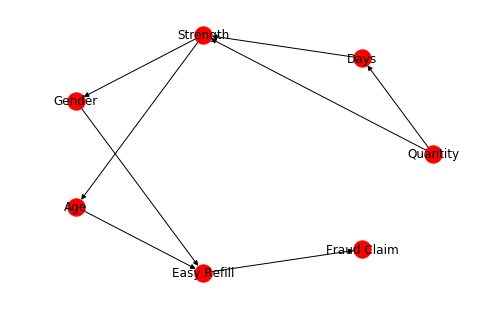

In [20]:
nx.draw_shell(model,with_labels=True)
plt.show()

## Perform parametric estimation of probabilities with ONLY Drug ID

In [21]:
claims_features2_df['Fraud'] = claims1_df['Fraud']
print(claims_features2_df.info(), '\n')
claims_features2_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
DCID     2000 non-null int64
Fraud    2000 non-null int64
dtypes: int64(2)
memory usage: 31.3 KB
None 



,DCID,Fraud
0,406048533,0
1,65162003434,0
2,62037052524,0
3,65162003434,0
4,42858010324,0


In [22]:
claims_feature2_model = BayesianModel([('DCID', 'Fraud')])
claims_feature2_model.nodes()

NodeView(('DCID', 'Fraud'))

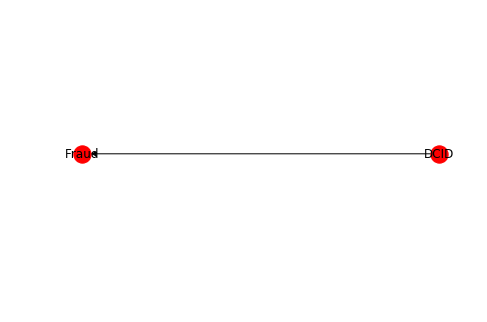

In [23]:
nx.draw_shell(claims_feature2_model,with_labels=True)
plt.show()

In [24]:
claims_feature2_model.fit(claims_features2_df, estimator=MaximumLikelihoodEstimator)

In [25]:
claims_feature2_model.get_cpds()

[<TabularCPD representing P(DCID:158) at 0x29b000ab240>,
 <TabularCPD representing P(Fraud:2 | DCID:158) at 0x29b7df75c88>]

## Perform parametric estimation of probabilities with ALL the key dependent varaibles

In [26]:
model2 = BayesianModel() 

#Add nodes and edges to this network:
model2.add_nodes_from(['Qty', 'Days', 'Strength', 'Gender', 'Age', 'EarlyRefill', 'Fraud'])
model2.add_edge('Qty', 'Days')
model2.add_edge('Qty', 'Strength')
model2.add_edge('Days', 'Strength')
model2.add_edge('Strength', 'Gender')
model2.add_edge('Strength', 'Age')
model2.add_edge('Gender', 'EarlyRefill')
model2.add_edge('Age', 'EarlyRefill')
model2.add_edge('EarlyRefill', 'Fraud' )

In [27]:
model2.nodes()

NodeView(('Qty', 'Days', 'Strength', 'Gender', 'Age', 'EarlyRefill', 'Fraud'))

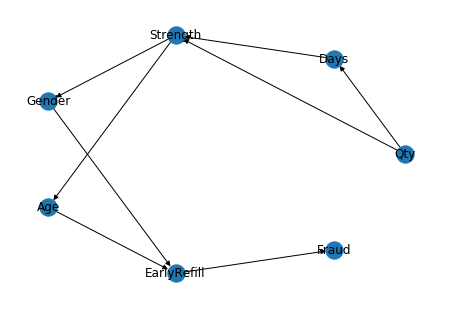

In [28]:
nx.draw_shell(model2,with_labels=True)
plt.show()

In [29]:
claims_features_df['Fraud'] = claims1_df['Fraud']
claims_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
Qty            2000 non-null int64
Days           2000 non-null int64
Strength       2000 non-null float64
Gender         2000 non-null int64
Age            2000 non-null int64
EarlyRefill    2000 non-null int64
Fraud          2000 non-null int64
dtypes: float64(1), int64(6)
memory usage: 109.5 KB


In [30]:
model2.fit(claims_features_df, estimator=MaximumLikelihoodEstimator)

In [31]:
model2.get_cpds()

[<TabularCPD representing P(Age:48 | Strength:20) at 0xcb7aeb8>,
 <TabularCPD representing P(Days:28 | Qty:63) at 0xc9ea208>,
 <TabularCPD representing P(EarlyRefill:2 | Age:48, Gender:2) at 0xcb5c4e0>,
 <TabularCPD representing P(Fraud:2 | EarlyRefill:2) at 0xc941860>,
 <TabularCPD representing P(Gender:2 | Strength:20) at 0xcb5cd30>,
 <TabularCPD representing P(Qty:63) at 0xcb5ce48>,
 <TabularCPD representing P(Strength:20 | Days:28, Qty:63) at 0xcb5c320>]

## Find out all events leading to a case of substance abuse with rare evidence

In [32]:
model2.active_trail_nodes('Fraud')

{'Fraud': {'Age', 'Days', 'EarlyRefill', 'Fraud', 'Gender', 'Qty', 'Strength'}}

In [33]:
model2.active_trail_nodes('Qty',observed ='Fraud')

{'Qty': {'Age', 'Days', 'EarlyRefill', 'Gender', 'Qty', 'Strength'}}

# Markov Chain:

## How likely a PATIENT is to switch from LOW dose category to HIGH dose category (Change in supply/ Reduction in days/ Changed strength of drug?)

In [5]:
claims1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
UID             2000 non-null int64
PhID            2000 non-null int64
PresID          2000 non-null int64
CLID            2000 non-null float64
PATID           2000 non-null int64
ID              2000 non-null int64
DCID            2000 non-null int64
Qty             2000 non-null int64
Days            2000 non-null int64
Refill          2000 non-null int64
Strength        2000 non-null float64
Amount          2000 non-null float64
Gender          2000 non-null int64
Age             2000 non-null int64
Fill Date       2000 non-null object
Written Date    2000 non-null object
Fill GAP        2000 non-null int64
NextRefill      2000 non-null object
EarlyRefill     2000 non-null int64
Fraud           2000 non-null int64
dtypes: float64(3), int64(14), object(3)
memory usage: 312.6+ KB


In [6]:
patient_list = claims1_df['PATID'].unique().tolist()
print("Patient Count: ", len(patient_list), '\n')

Patient Count:  334 



In [7]:
strength_states = claims1_df['Strength'].unique().tolist()
print(type(strength_states), '\n')
print("Strength States Count: ", len(strength_states), '\n')

<class 'list'> 

Strength States Count:  20 



In [8]:
strength_states.sort(reverse=False)
print(strength_states)

[0.36, 0.5, 1.5, 3.75, 4.5, 5.0, 7.5, 8.0, 9.0, 10.0, 11.25, 13.5, 15.0, 22.5, 30.0, 45.0, 60.0, 120.0, 180.0, 240.0]


## Setting Sort order: PATID, DCID, Strength

In [9]:
claim_selected = claims1_df[['PATID', 'DCID', 'Strength', 'PhID', 'Days']]
claim_selected_sorted = claim_selected.sort_values(['PATID', 'DCID', 'Strength'], ascending=[True, True, True])


In [10]:
claim_selected_sorted.head(10)

,PATID,DCID,Strength,PhID,Days
0,200599,406048533,4.5,3127172,3
2,200810,62037052524,7.5,3127934,2
1,200810,65162003434,4.5,3127934,4
3,200810,65162003434,4.5,3127934,2
4,201658,42858010324,7.5,3141427,30
5,201658,42858010324,7.5,3141427,8
6,201658,42858010324,7.5,3141427,5
7,201666,603388844,10.0,3139050,7
8,201666,603389244,7.5,3194529,4
9,201781,42858020473,10.0,3199300,5


In [11]:
claim_selected_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 5 columns):
PATID       2000 non-null int64
DCID        2000 non-null int64
Strength    2000 non-null float64
PhID        2000 non-null int64
Days        2000 non-null int64
dtypes: float64(1), int64(4)
memory usage: 93.8 KB


In [12]:
claim_selected_sorted.columns

Index(['PATID', 'DCID', 'Strength', 'PhID', 'Days'], dtype='object')

In [30]:
# Create EMPTY claims_filtered DF
claims_filtered = pd.DataFrame(columns=claim_selected_sorted.columns)
claims_filtered['PATID'] = pd.to_numeric(claims_filtered['PATID'])
claims_filtered['DCID'] = pd.to_numeric(claims_filtered['DCID']) 
claims_filtered['Strength'] = claims_filtered['Strength'].astype(float)
claims_filtered['PhID'] = pd.to_numeric(claims_filtered['PhID']) 
claims_filtered['Days'] = pd.to_numeric(claims_filtered['Days'])
claims_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
PATID       0 non-null int64
DCID        0 non-null int64
Strength    0 non-null float64
PhID        0 non-null int64
Days        0 non-null int64
dtypes: float64(1), int64(4)
memory usage: 0.0+ bytes


## OBSERVATION: On including Drug Id, out of 334 patients, ZERO patients have upgraded to higher doseage!!

In [31]:
current_patientID = 0
current_drugID = 0
current_strength = 0.0
current_row = 0

print("claim_selected_sorted at Start: ", len(claim_selected_sorted),'\n')
print("claims_filtered at Start: ", len(claims_filtered), '\n')

for row in range(len(claim_selected_sorted)):
    if (current_patientID == claim_selected_sorted.loc[row,'PATID'] ):
        if (current_drugID == claim_selected_sorted.loc[row,'DCID']):
            if (current_strength < claim_selected_sorted.loc[row,'Strength']):
                claims_filtered.loc[current_row] = claim_selected_sorted.iloc[row]
                print("Source : ", claim_selected_sorted.iloc[row], '\n')
                print("Filtered : ", claims_filtered.iloc[current_row], '\n')
                print("Strength Current: ", current_strength, " New: ", claim_selected_sorted.loc[row,'Strength'] )
                current_row += 1
    current_patientID = claim_selected_sorted.loc[row,'PATID']
    current_drugID = claim_selected_sorted.loc[row,'DCID']
    current_strength = claim_selected_sorted.loc[row,'Strength']    
    
print("claim_selected_sorted at End: ", len(claim_selected_sorted),'\n')
print("claims_filtered at End: ", len(claims_filtered), '\n')

claim_selected_sorted at Start:  2000 

claims_filtered at Start:  0 

claim_selected_sorted at End:  2000 

claims_filtered at End:  0 



## Excluding the Drug ID in the Filter

In [32]:
current_patientID = 0
current_drugID = 0
current_strength = 0.0
current_row = 0

print("claim_selected_sorted at Start: ", len(claim_selected_sorted),'\n')
print("claims_filtered at Start: ", len(claims_filtered), '\n')

for row in range(len(claim_selected_sorted)):
    if (current_patientID == claim_selected_sorted.loc[row,'PATID'] ):
#         if (current_drugID == claim_selected_sorted.loc[row,'DCID']):
        if (current_strength < claim_selected_sorted.loc[row,'Strength']):
            claims_filtered.loc[current_row] = claim_selected_sorted.iloc[row]
#             print("Source : ", claim_selected_sorted.iloc[row], '\n')
#             print("Filtered : ", claims_filtered.iloc[current_row], '\n')
#             print("Strength Current: ", current_strength, " New: ", claim_selected_sorted.loc[row,'Strength'] )
            current_row += 1
    current_patientID = claim_selected_sorted.loc[row,'PATID']
    current_drugID = claim_selected_sorted.loc[row,'DCID']
    current_strength = claim_selected_sorted.loc[row,'Strength']  
    
print("claim_selected_sorted at End: ", len(claim_selected_sorted),'\n')
print("claims_filtered at End: ", len(claims_filtered), '\n')

claim_selected_sorted at Start:  2000 

claims_filtered at Start:  0 

claim_selected_sorted at End:  2000 

claims_filtered at End:  297 



In [45]:
claims_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 5 columns):
PATID       297 non-null float64
DCID        297 non-null float64
Strength    297 non-null float64
PhID        297 non-null float64
Days        297 non-null float64
dtypes: float64(5)
memory usage: 13.9 KB


In [46]:
claims_filtered['PATID'] = claims_filtered['PATID'].astype(int) # pd.to_numeric(claims_filtered['PATID'])
# claims_filtered['PATID'] = np.dtype(claims1_df['PATID']).type   # claims_filtered['PATID'].astype(int) 
claims_filtered['DCID'] = claims_filtered['DCID'].astype(int) # pd.to_numeric(claims_filtered['DCID']) 
claims_filtered['Strength'] = claims_filtered['Strength'].astype(float)
claims_filtered['PhID'] = claims_filtered['PhID'].astype(int) # pd.to_numeric(claims_filtered['PhID']) 
claims_filtered['Days'] = claims_filtered['Days'].astype(int) # pd.to_numeric(claims_filtered['Days'])
claims_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 5 columns):
PATID       297 non-null int32
DCID        297 non-null int32
Strength    297 non-null float64
PhID        297 non-null int32
Days        297 non-null int32
dtypes: float64(1), int32(4)
memory usage: 9.3 KB


In [47]:
print(claims_filtered.shape)
claims_filtered.head(10)

(297, 5)


,PATID,DCID,Strength,PhID,Days
0,200810,-2147483648,4.5,3127934,4
1,203687,406051328,7.5,3196458,30
2,203857,-2147483648,45.0,3145079,30
3,203857,-2147483648,4.5,3127932,5
4,204961,-2147483648,5.0,3142847,3
5,205609,-2147483648,7.5,3136056,15
6,206959,-2147483648,15.0,3197323,30
7,207123,406833124,30.0,3149014,30
8,207123,406833124,30.0,3149014,30
9,207123,406833124,30.0,3149014,30


## OBSERVATION: On excluding Drug Id, out of 334 patients, 297 patients have upgraded to higher doseage!!

## Markov Chain: Process Data from 'Claim_Dataset_Part2.csv' File

In [48]:
claims2_df=pd.read_csv('Claim_Dataset_Part2.csv', sep=',')
print(claims2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 21 columns):
PATID     335 non-null int64
Fraud     335 non-null object
Dec-16    103 non-null float64
Jan-17    79 non-null float64
Feb-17    80 non-null float64
Mar-17    83 non-null float64
Apr-17    77 non-null float64
May-17    89 non-null float64
Jun-17    96 non-null float64
Jul-17    76 non-null float64
Aug-17    83 non-null float64
Sep-17    75 non-null float64
Oct-17    76 non-null float64
Nov-17    80 non-null float64
Dec-17    88 non-null float64
Jan-18    50 non-null float64
Feb-18    58 non-null float64
Mar-18    56 non-null float64
Apr-18    62 non-null float64
May-18    71 non-null float64
Jun-18    78 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 55.0+ KB
None


In [49]:
claims2_df.head(5)

,PATID,Fraud,Dec-16,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,...,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18
0,200599,N,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,200810,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2,201658,N,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201666,N,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201781,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Define state space of an event

In [50]:
fraud_states = claims2_df['Fraud'].unique().tolist()
print("Fraud States Count: ", len(fraud_states), '\n')
fraud_states

Fraud States Count:  2 



['N', 'Y']

In [51]:
size = len(fraud_states)
print(size)

2


In [52]:
# Possible sequences of events
transitionName = [["F","N"],["F","F"],['N', 'N'], ['N', 'Y']]

# Probabilities matrix (transition matrix - an empty one)
import numpy as np
transitionMatrix = np.zeros((size,size))
transitionMatrix

array([[0., 0.],
       [0., 0.]])

In [53]:
patients_list = claims2_df['PATID'].unique().tolist()
patients_list

[200599,
 200810,
 201658,
 201666,
 201781,
 202002,
 202743,
 202840,
 203418,
 203448,
 203626,
 203687,
 203857,
 203863,
 203930,
 203938,
 204021,
 204961,
 205167,
 205609,
 206062,
 206242,
 206322,
 206611,
 206959,
 207002,
 207040,
 207123,
 207125,
 207141,
 207151,
 207822,
 208304,
 208411,
 208420,
 208760,
 208821,
 209420,
 209624,
 210195,
 210238,
 210993,
 211254,
 211337,
 211383,
 211550,
 211570,
 211626,
 211652,
 211677,
 211704,
 211734,
 211785,
 211860,
 211911,
 211944,
 212131,
 212214,
 212593,
 212613,
 212846,
 212877,
 213118,
 213192,
 213768,
 214116,
 214277,
 214742,
 214816,
 215080,
 215146,
 215404,
 216020,
 216068,
 216185,
 216266,
 216339,
 216363,
 216555,
 216638,
 216673,
 216708,
 216733,
 216910,
 216915,
 216959,
 217289,
 217394,
 217502,
 217544,
 217823,
 217963,
 218042,
 218066,
 218074,
 218603,
 218617,
 218655,
 218736,
 219155,
 219304,
 219360,
 219441,
 219457,
 219474,
 219572,
 219644,
 220062,
 220387,
 220786,
 220932,
 

## Draw inference by estimating posterior probabilities of events

In [54]:
for x in patients_list:
  single_patient = claims2_df.loc[claims2_df['PATID'] == x]
  fraud1 = "NA"
  for i in range(2,21):
        for j in range(0,len(single_patient)):
            num = single_patient.values[j,i]
            if (num == 1.0):
                if (fraud1 == "NA"):
                    fraud1 = single_patient.values[j,1]
                else:
                    fraud2 = single_patient.values[j,1]
                    if (fraud1 == "N" and fraud2 == "N"):
                        transitionMatrix[0,0] = transitionMatrix[0,0] + 1
                    if (fraud1 == "N" and fraud2 == "Y"):
                        transitionMatrix[0,1] = transitionMatrix[0,1] + 1
                    if (fraud1 == "Y" and fraud2 == "N"):
                        transitionMatrix[1,0] = transitionMatrix[1,0] + 1
                    if (fraud1 == "Y" and fraud2 == "Y"):
                        transitionMatrix[1,1] = transitionMatrix[1,1] + 1

                    fraud1 = fraud2
transitionMatrix

array([[1.067e+03, 1.000e+00],
       [1.000e+00, 5.600e+01]])

In [55]:
transitionMatrix=(transitionMatrix.T/transitionMatrix.sum(axis=1)).T

In [56]:
import numpy as np
import random as rm
def fraud_forecast(fraud_num):
    # Choose the starting state
    first_fraud = "N"
    print("First Fraud: " + first_fraud)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    fraudList = [first_fraud]
    i = 0
    # To calculate the probability of the fraudList
    prob = 1
    while i != fraud_num:
        if first_fraud == "N":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "Y":
                prob = prob * transitionMatrix[0,0]
                first_fraud = "Y"
                fraudList.append("Y")
                pass
            else:
                prob = prob * transitionMatrix[0,1]
                first_fraud = "N"
                fraudList.append("N")

        elif first_fraud == "Y":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "N":
                prob = prob * transitionMatrix[1,0]
                fraudList.append("N")
                pass
            else:
                prob = prob * transitionMatrix[1,1]
                first_purchase = "Y"
                fraudList.append("Y")
        i += 1  
    print("Possible states: " + str(fraudList))
    print("Probability of the possible sequence of states: " + str(prob))

In [57]:
fraud_forecast(10)

First Fraud: N
Possible states: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
Probability of the possible sequence of states: 5.179495654908889e-31


## Inferences

1) Very LOW number for the "Probability of the possible sequence of states", based on the data
2) As a result, for a sequence of ten, the forcast of the state does not change

## Note

Tech. Support, upon review, has commented this implementation meets and exceeds expectations

In [58]:
end_time = time.time()
end_time

1561652090.8884711

In [59]:
elapsed_time = end_time - start_time
elapsed_time

41.004345417022705